# Análise exploratória de dados

In [148]:
from IPython.display import display, Markdown

In [149]:
import numpy as np

In [132]:
import pandas as pd

In [154]:
import matplotlib.pyplot as plt

In [155]:
import seaborn as sns

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]

# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do Conjunto de Dados

In [135]:
df = pd.read_csv('../data/raw/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Descrição do Conjunto de dados 

O conjunto de dados Titanic, escolhido para este estudo, foi obtido da plataforma Kaggle, embora também esteja disponível em outras fontes. Este conjunto de dados é amplamente utilizado em análises exploratórias de dados e projetos de aprendizado de máquina devido à sua riqueza de informações sobre os passageiros do RMS Titanic. O Titanic naufragou na noite de 15 de abril de 1912 após colidir com um iceberg, resultando na perda de inúmeras vidas. O dataset contém um compêndio detalhado sobre os passageiros, incluindo informações de embarque e sobrevivência, o que permite realizar uma variedade de análises e modelagens preditivas relacionadas a esse trágico evento histórico.
Neste conjunto de dados, a variável dependente é **Survived**, e as variáveis preditoras são **Pclass**, **Sex**, **Age**, **SibSp**, **Parch**, **Fare**, **Embarked**, **Class**, **Who**, **Adult_male**, **Deck**, **Embark_town**, **Alive** e **Alone**.

### 2.1. Dicionário de Dados

In [22]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descrição,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu (sim = 1 ou ...,qualitativa,nominal
1,pclass,"Classe do ticket do passageiro (1 = 1ª, 2 = 2ª...",qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Número de irmãos/cônjuges a bordo,quantitativa,discreta
5,parch,Número de pais/filhos a bordo,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro,quantitativa,contínua
7,embarked,Porto de embarque (C = Cherbourg; Q = Queensto...,qualitativa,nominal
8,class,"Classe do ticket (Primeira, Segunda, Terceira)",qualitativa,ordinal
9,who,"Descrição da pessoa (homem, mulher, criança)",qualitativa,nominal


In [20]:
display(Markdown(
    "---\n"
    f"* O conjunto apresenta 15 variáveis, com 8 qualitativas nominais, 3 qualitativas ordinais, e 4 quantitativas (2 contínuas e 2 discretas)."
    "\n\n ---"
))

---
* O conjunto apresenta 15 variáveis, com 8 qualitativas nominais, 3 qualitativas ordinais, e 4 quantitativas (2 contínuas e 2 discretas).

 ---

### 2.2. Verificação sobre dados ausentes

In [16]:
# colunas (variáveis) contendo valores ausentes
df = pd.read_csv('../data/raw/titanic.csv')
missing_values = df.isnull().sum()
number_of_na_rows = df.isnull().any(axis=1).sum()
number_of_na_by_column = missing_values[missing_values > 0]

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"Com base nessas informações, identificamos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"possuem valores faltantes. Além disso, observamos que há um total de `{number_of_na_rows}` linhas com dados ausentes."
    f" Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes."
    "\n\n ---"
))

df.dropna(inplace=True)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

---
Com base nessas informações, identificamos que as variáveis `['age', 'embarked', 'deck', 'embark_town']`possuem valores faltantes. Além disso, observamos que há um total de `709` linhas com dados ausentes. Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes.

 ---

## 3. Perguntas de partida e hipóteses

**1. Qual foi a taxa de sobrevivência geral dos passageiros?**


_Hipótese: A taxa de sobrevivência geral é menor que 50%._


**2. Qual foi a taxa de sobrevivência por classe?**

_Hipótese: Passageiros da primeira classe tinham uma taxa de sobrevivência maior do que aqueles da segunda e terceira classes._


**3. Qual era a distribuição de idade entre os passageiros?**


_Hipótese: A distribuição de idade mostra que a maioria dos passageiros tinha entre 20 e 40 anos._


**4. Qual era a proporção de passageiros por classe?**


_Hipótese: A maioria dos passageiros estava na terceira classe._


**5. Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência?**


_Hipótese: Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência._

**6. Quantos passageiros estavam viajando sozinhos versus acompanhados por familiares?**

_Hipótese: Passageiros viajando com familiares tinham uma maior taxa de sobrevivência do que aqueles viajando sozinhos._

### Qual foi a taxa de sobrevivência geral dos passageiros?

_Hipótese: A taxa de sobrevivência geral é menor que 50%._

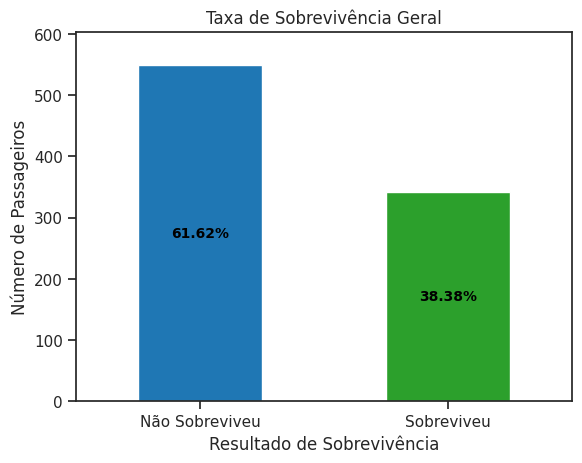

In [55]:
# Qual foi a taxa de sobrevivência geral dos passageiros? 
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
survival_counts = titanic_data ['survived'].value_counts()
survival_counts.plot(kind='bar', color=['red', 'blue'])
total_passengers = survival_counts.sum()
survival_percentages = survival_counts / total_passengers * 100
colors = ['#1f77b4', '#2ca02c']
ax = survival_counts.plot(kind='bar', color=colors)
plt.title('Taxa de Sobrevivência Geral')
plt.xlabel('Resultado de Sobrevivência')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], rotation=0)
for i, (count, percentage) in enumerate(zip(survival_counts, survival_percentages)):
    ax.text(i, count / 2, f'{percentage:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')

plt.ylim(0, survival_counts.max() * 1.1)
plt.show()

### Qual foi a taxa de sobrevivência por classe?

_Hipótese: Passageiros da primeira classe tinham uma taxa de sobrevivência maior do que aqueles da segunda e terceira classes._

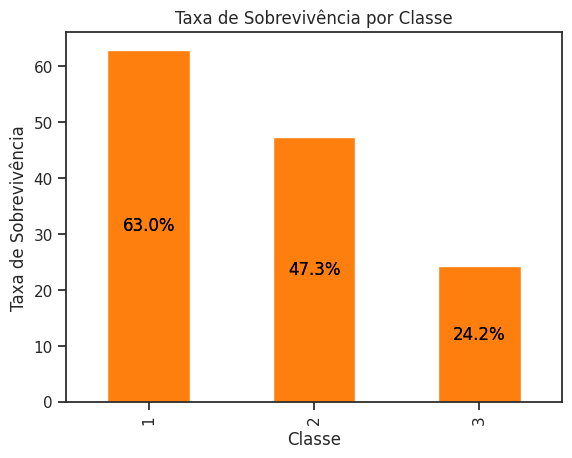

In [70]:
# Qual foi a taxa de sobrevivência por classe?
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
survival_rate_by_class.plot(kind='bar', color='#ff7f0e')
survival_rate_by_class = titanic_data.groupby('pclass')['survived'].mean() * 100
ax = survival_rate_by_class.plot(kind='bar', color='#ff7f0e')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height / 2.),
                ha='center', va='center', 
                color='black',
                xytext=(0, 0), textcoords='offset points')

plt.show()

### Qual era a distribuição de idade entre os passageiros?

_Hipótese: A distribuição de idade mostra que a maioria dos passageiros tinha entre 20 e 40 anos._

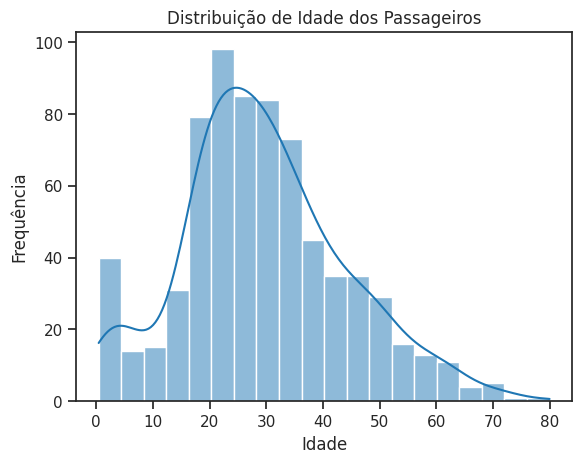

In [71]:
# Qual era a distribuição de idade entre os passageiros?
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
sns.histplot(titanic_data['age'].dropna(), kde=True)
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### Qual era a proporção de passageiros por classe?

_Hipótese: A maioria dos passageiros estava na terceira classe._

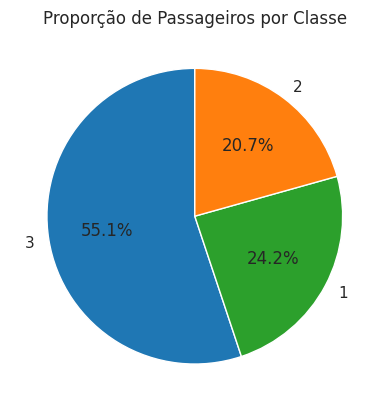

In [72]:
# Qual era a proporção de passageiros por classe?
passenger_count_by_class = titanic_data['pclass'].value_counts(normalize=True)
passenger_count_by_class.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Passageiros por Classe')
plt.ylabel('')
plt.show()


### Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência?

_Hipótese: Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência._

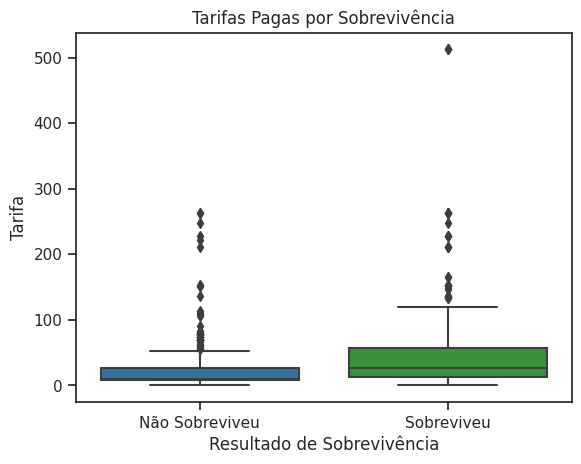

In [74]:
# Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência?
sns.boxplot(x='survived', y='fare', data=titanic_data)
plt.title('Tarifas Pagas por Sobrevivência')
plt.xlabel('Resultado de Sobrevivência')
plt.ylabel('Tarifa')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

### Quantos passageiros estavam viajando sozinhos versus acompanhados por familiares?

_Hipótese: Passageiros viajando com familiares tinham uma maior taxa de sobrevivência do que aqueles viajando sozinhos._

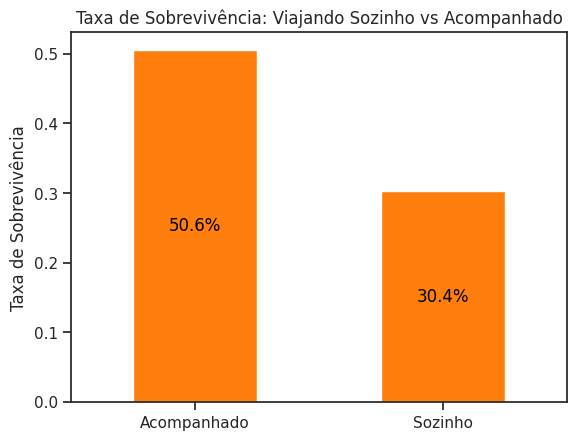

In [181]:
# Quantos passageiros estavam viajando sozinhos versus acompanhados por familiares?
import matplotlib.pyplot as plt
titanic_data['alone'] = (titanic_data['sibsp'] == 0) & (titanic_data['parch'] == 0)
survival_by_alone = titanic_data.groupby('alone')['survived'].mean()
ax = survival_by_alone.plot(kind='bar', color='#ff7f0e')
for bar in ax.patches:
    height = bar.get_height()
    percentage = f'{height:.1%}'  
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percentage, 
            ha='center', va='center', color='black', fontsize=12)
plt.title('Taxa de Sobrevivência: Viajando Sozinho vs Acompanhado')
plt.xlabel('')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1], ['Acompanhado', 'Sozinho'], rotation=0)
plt.show()

## 4. Insights